## List Decoding: Bridging the gap between Hamming and Shannon

### Two Perspectives on Noise: Hamming vs. Shannon

In coding theory, we have two fundamental views on communication over a noisy channel:

- **Shannon theory.** This probabilistic model shows that for a channel with random noise (like the q-ary Symmetric Channel, or qSC$_p$), we can achieve reliable communication for any rate  
  $$R < 1 - H_q(p).$$
  This promises successful communication even with a relatively high fraction of errors.

- **Hamming theory.** This model takes a more pessimistic, worst-case view. It provides a 100% guarantee of error correction, but only for a much smaller fraction of errors.

There is a significant gap between the number of errors these two theories can handle. This section explores the mathematical and geometric reasons for the strict limits of the Hamming world, which sets the stage for list decoding as a bridge between the two.


### The Quantitative Limit of Unique Decoding

Let’s define our terms from the Hamming perspective. A code has a **rate** $R = k/n$ (message length / codeword length) and a **relative distance** $\delta = d/n$ (minimum distance / codeword length).

The central tenet of unique decoding is that it can correct a fraction of errors up to half the relative distance. By the Singleton bound, we know that a code’s relative distance is limited by its rate:
$$\delta \le 1 - R.$$
This directly implies that the fraction of correctable errors, $p$, must satisfy the following condition:
$$p \le \frac{1 - R}{2}.$$

This is the hard barrier for unique decoding. If the fraction of errors exceeds this, the worst-case guarantee is broken. Reed–Solomon codes are optimal in this regard, as they can achieve this bound.


### Visualizing the Breakdown: The “Bad Examples”

The reason for this strict limit is best understood visually. Consider the figure
<img src="./imgs/image_bad_examples.png" alt="Generic model of a communication system" width="600"/>

where $c_1, c_2, c_3, c_4$ are valid codewords.

The decoder fails for received words that fall into the “bad examples” region (the area with dotted lines). This happens in two key scenarios:

- **Ambiguity (point $y$).** The received word $y$ has been corrupted such that it lies exactly halfway between two codewords, say $c_1$ and $c_4$. Its distance to both is exactly $\delta/2$. Since there is no **unique** closest codeword, the decoder must give up.

- **Decoding failure (point $z$).** The received word $z$ does not fall within the $\delta/2$ decoding radius of **any** codeword. It exists in the interstitial space between them, and the decoder again declares a failure.


### The Path Forward: List Decoding

The unique decoding model is pessimistic because the number of these “bad examples” is insignificant compared to the total volume of possible received words. However, the model’s strict requirement for a unique answer forces it to fail even in these rare cases.

To overcome this, we relax the demand for a single candidate. This leads to **list decoding**, a paradigm where the decoder, instead of failing, returns a short list of all plausible codewords.

## The Core Concept of List Decoding

### A New Paradigm: From One to Many

In the previous section, we saw how the strict requirement of a single, unique answer forced the decoder to fail even in scenarios where a received word was close to a small number of valid codewords. To overcome this limitation, we turn to a relaxed notion of decoding called **list decoding**.

Instead of outputting a single candidate for the message, a list-decoding algorithm is allowed to output a short list of all plausible messages. This notion is formally parameterized by two values:

- **$\rho$** (rho): The fraction of errors we wish to correct. This defines the radius of our search.
- **$L$**: A number representing the maximum allowed size of the output list.

### Formal Definition

The concept of list decodability is fundamentally a combinatorial property of a code. It guarantees that no single point in the entire space of possible received words is “too close” to a large number of codewords simultaneously. The formal definition is as follows:

**Combinatorial List Decoding:**  
Given $0 \le \rho \le 1$ and $L \ge 1$, a code $C \subseteq \Sigma^n$ is $(\rho, L)$-list decodable if for every received word $y \in \Sigma^n$, we have:
$$
\left|\{\, c \in C \mid \Delta(y, c) \le \rho n \,\}\right| \le L .
$$

Let’s break this down:

- This is a worst-case definition that must hold for **every** possible received word $y$.
- $\Delta(y, c)$ is the Hamming distance between the received word $y$ and a codeword $c$.
- The set $\{\ldots\}$ contains all codewords from the code $C$ that are inside a Hamming ball of radius $\rho n$ centered at $y$.
- The definition simply states that the size of this set can never be larger than $L$.

### The List-Decoding Algorithm and Guarantee

While the definition above is about the code’s structure, a list-decoding **algorithm** works as follows: given an error parameter $\rho$, a code $C$, and a received word $y$, the algorithm’s task is to find and output **all** codewords that are within a relative Hamming distance $\rho$ of $y$.

This provides a powerful guarantee:

> **If the fraction of errors that actually occurred during transmission was at most $\rho$, then the transmitted codeword is guaranteed to be in the algorithm’s output list.**

Of course, the choice of $L$ is critical. If we set $L = 1$, we simply recover the notion of unique decoding. If we allow $L$ to be exponentially large, the concept becomes trivial. Therefore, our focus is on cases where $L$ is a small constant or, more generally, grows polynomially with the block length $n$.

### Practical Utility 

A natural question arises: if the decoder returns a list with more than one item, how do we recover the single correct message? There are two primary approaches to this problem:

1. **Declare a decoding error if the list size is greater than 1.**  
   This still represents a significant gain over unique decoding. For most error patterns, the list size is one with high probability, meaning we can successfully decode many more error patterns than the strict $d/2$ limit allows.

2. **Use side information to select the correct message.**  
   If the decoder has access to some external information, it can use that to “prune” the list. Informally, to pick the correct item from a list of size $L$, one needs approximately $O(\log L)$ extra bits of information. This is especially useful in applications like complexity theory, where maximizing the rate of the code is not the primary objective.

## The Johnson Bound

### Exceeding the Unique Decoding Limit

From our knowledge of list decoding, we encounter a critical question: can list decoding correct more than the $\delta/2$ fraction of errors imposed by the unique-decoding barrier?

The **Johnson Bound** answers this question with a definitive *yes*. It provides a new, larger radius $p$ up to which a code is guaranteed to be list-decodable with a polynomial-sized list. This is the first major result that quantitatively shows the power of list decoding over unique decoding. The bound is defined by a specific function, $J_q(\delta)$.


### The Johnson Bound Theorem

The theorem formally states the relationship between a code’s relative distance $\delta$ and the fraction of errors $p$ it can handle with list decoding.

**Theorem 7.3.1 (Johnson Bound)**  
Let $C \subset \{0,1\}^n$ be a code of distance $\delta$. If $p < J_q(\delta)$, then $C$ is a $(p,q\delta n)$-list-decodable code. The function $J_q(\delta)$ is defined as  

$$
J_q(\delta)=\left(1-\frac{1}{q}\right)\!\left(1-\sqrt{1-\frac{q\delta}{q-1}}\right).
$$

For the important binary case where $q=2$, this simplifies to  

$$
J_2(\delta)=\frac12\!\left(1-\sqrt{1-2\delta}\right).
$$

This theorem guarantees that for any error fraction $p$ less than this Johnson bound, the number of codewords in any Hamming ball of radius $pn$ will be small (at most $2\delta n$).


#### 3.3 Proof Sketch

The full proof of the Johnson Bound involves a clever *double-counting* argument. Instead of reproducing all the mathematical steps, here is a high-level sketch:

1. **Setup:** Assume for contradiction that there is a received word $y$ with a list of $M > 2\delta n$ candidate codewords $c_1,\dots,c_M$ in its Hamming ball.  
2. **Double Counting:** Define a quantity $S$ that counts the total number of agreements between pairs of these candidate codewords.  
3. **Upper and Lower Bounds:**  
   * *Upper bound* — obtained by analyzing the average number of errors.  
   * *Lower bound* — based on the fact that the distance between any two candidate codewords is at least $\delta$.  
4. **The Contradiction:** Combining these two bounds yields an inequality that contradicts the initial assumption that $M$ could be large. Consequently, $M \le 2\delta n$, proving the theorem.


### Code and Plot

The best way to see the improvement is to compare the Johnson Bound to the unique-decoding bound ($\delta/2$). The following code computes both bounds and generates a plot visualizing the trade-off between relative distance $\delta$ and the correctable fraction of errors $p$.

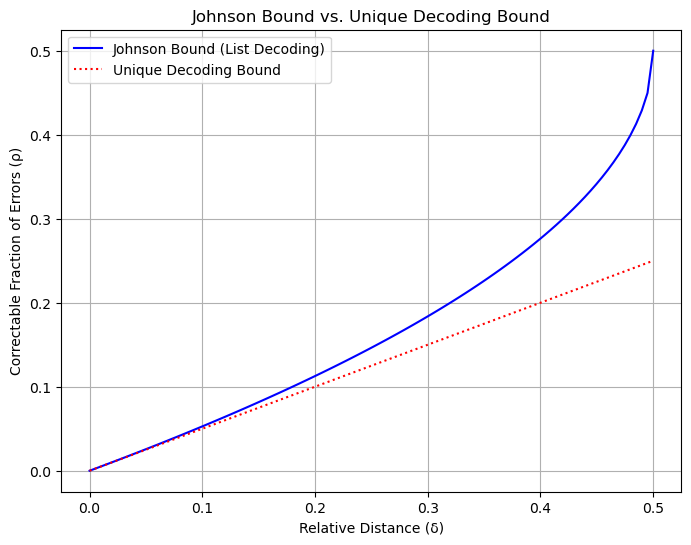

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def unique_decoding_bound(delta):
    return delta / 2

def johnson_bound_binary(delta):
    if 1 - 2 * delta < 0:
        return np.nan
    return 0.5 * (1 - np.sqrt(1 - 2 * delta))

delta_values = np.linspace(0, 0.5, 100)
ud_bound_values = [unique_decoding_bound(d) for d in delta_values]
jb_bound_values = [johnson_bound_binary(d) for d in delta_values]

plt.figure(figsize=(8, 6))
plt.plot(delta_values, jb_bound_values, '-', label='Johnson Bound (List Decoding)', color='blue')
plt.plot(delta_values, ud_bound_values, ':', label='Unique Decoding Bound', color='red')
plt.title('Johnson Bound vs. Unique Decoding Bound')
plt.xlabel('Relative Distance (δ)')
plt.ylabel('Correctable Fraction of Errors (ρ)')
plt.legend()
plt.grid(True)
plt.show()

The plot clearly shows that the Johnson Bound (solid line) always lies above the unique-decoding bound (dotted line), demonstrating that list decoding can always handle a strictly larger fraction of errors.


We can also visualize the trade-off in terms of *Rate* ($R$) versus *Fraction of Errors* ($p$). Assuming the Singleton Bound ($\delta = 1-R$), both bounds can be plotted in the $(R,p)$ plane to highlight their differences.



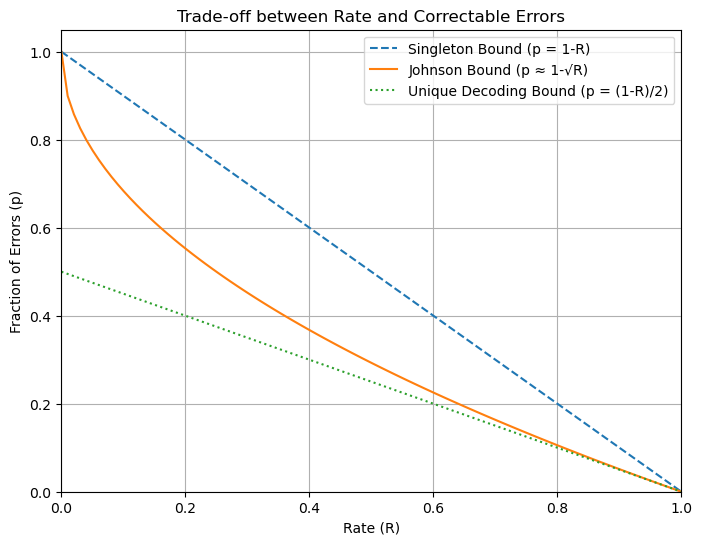

In [3]:
rate_values = np.linspace(0, 1, 100)
singleton_bound_p = 1 - rate_values
unique_decoding_p = (1 - rate_values) / 2
johnson_bound_p = 1 - np.sqrt(rate_values)

plt.figure(figsize=(8, 6))
plt.plot(rate_values, singleton_bound_p, '--', label='Singleton Bound (p = 1-R)')
plt.plot(rate_values, johnson_bound_p, '-', label='Johnson Bound (p ≈ 1-√R)')
plt.plot(rate_values, unique_decoding_p, ':', label='Unique Decoding Bound (p = (1-R)/2)')

plt.title('Trade-off between Rate and Correctable Errors')
plt.xlabel('Rate (R)')
plt.ylabel('Fraction of Errors (p)')
plt.ylim(0, 1.05)
plt.xlim(0, 1)
plt.legend()
plt.grid(True)
plt.show()



### A Key Property of the Johnson Bound

This figure perfectly illustrates the gap between the different decoding methods: the Johnson Bound carves out a significant new region of correctable errors that unique decoding cannot reach.

**Lemma**  
Let $q \ge 2$ be an integer and let $0 \le x \le 1 - \tfrac1q$. Then  

$$
J_q(x) \;\ge\; 1-\sqrt{1-x} \;\ge\; \frac{x}{2}.
$$

The proof relies on comparing derivatives of the functions and showing that $J_q(x)$ grows more rapidly than the other terms. Together with Theorem 7.3.1, this confirms that for any $\delta>0$, list decoding corrects a strictly larger fraction of errors than unique decoding.

## List-Decoding Capacity

### The Ultimate Limit of List Decoding
So far, we've established that list decoding can correct more errors than unique decoding.  
But what is the ultimate limit?  
The concept of **List-Decoding Capacity** provides the answer by defining the optimal trade-off between the code’s rate $R$ and the fraction of errors $p$ it can handle.

This result shows that by allowing a decoder to output a list of candidates, we can achieve the same rate of communication promised by Shannon’s theory for random noise, but with a worst-case error guarantee. 

### The Capacity Theorem
The following theorem establishes a sharp threshold for list decoding.  
It shows that for any rate below a specific capacity limit, a good list-decodable code exists.  
Conversely, for any rate above this limit, no code can be reliably list-decoded.

**Theorem 7.4.1 (List-Decoding Capacity)**  
Let $q \ge 2$, $0 \le p < 1 - 1/q$, and $\varepsilon > 0$ be a small enough real number.  
Then the following holds for codes of large enough block length $n$:

- **(i) Achievability:** If $R \le 1 - H_q(p) - \varepsilon$, then there exists a $(p,\;O(1/\varepsilon))$-list-decodable code.
- **(ii) Converse:** If $R \ge 1 - H_q(p) + \varepsilon$, then every $(p,L)$-list-decodable code must have $L \ge q^{\Omega(\varepsilon n)}$.

Here, $H_q(p)$ is the $q$-ary entropy function, which generalizes the binary entropy we saw in the Shannon notebook.


### Significance and Benefits 

- **Bridging Two Worlds:** The list-decoding capacity is $1 - H_q(p)$.  
  This exactly matches the Shannon capacity for a channel with random noise.  
  This means list decoding bridges the gap between the pessimistic worst-case guarantees of the Hamming world and the optimistic possibilities of the Shannon world.

- **Superior to Unique Decoding:** For unique decoding, the rate is limited by $R = 1 - 2p$.  
  For list decoding, the rate is $R = 1 - H_q(p)$.  
  Since $H_q(p)$ is always much smaller than $2p$ (for $p > 0$), list decoding allows for building codes with **much better rates for the same error-correction capability.**

- **Proof by Randomness:** The proof of the achievability part (i) uses the probabilistic method.  
  It shows that a randomly chosen code will have the desired list-decoding properties with very high probability.

## How List Decoding Secures the FRI Protocol

### What is FRI? A High-Level View

FRI stands for **Fast Reed-Solomon Interactive Oracle Proof of Proximity**.  
At its core, FRI is a protocol that allows a Prover to convince a Verifier of a powerful statement: that a function they have committed to is "close" to being a low-degree polynomial, without the Verifier having to read the entire function.
 
The core mechanism of FRI is recursive: it takes a large set of function evaluations (a Reed-Solomon codeword) and repeatedly *"folds"* it, generating new, smaller codewords at each step.  
The Verifier performs consistency checks between these layers. The final layer is a single constant that the Verifier can check directly.


### The Prover, The Verifier, and The Challenge


- **The Prover's Commitment:** The Prover begins with a computational trace, which can be represented as a polynomial $P(x)$. They evaluate this polynomial over a large domain to create a Reed-Solomon codeword, $C$, and commit to this codeword.

- **The Verifier's Goal:** The Verifier wants to check that the committed codeword $C$ is indeed a valid codeword from the code of low-degree polynomials. However, they want to do this very efficiently, by querying only a few positions of $C$.

- **The Cheater's Strategy:** A malicious Prover might commit to a codeword $C'$ that is *not* a low-degree polynomial but is cleverly constructed to look like one on a few positions.


### Soundness: Where List Decoding Comes In

The security of the FRI protocol against a malicious Prover is guaranteed by the principles of list decoding. The argument is as follows:

A commitment from a cheating Prover can be seen as a "received word" $y$ that is, by design, **far** from the code $\mathcal{C}$ of true low-degree polynomials.  
The Verifier's random checks are equivalent to sampling positions of this received word $y$ and a potential codeword $c$ to see if they agree.

List-decoding theory gives us hard bounds on this scenario.  
We know that if a received word $y$ is far from the entire code $\mathcal{C}$, it cannot have a high level of agreement with **any** single codeword $c \in \mathcal{C}$.  
If it did, it would imply $y$ is "close" to $c$, which contradicts our assumption that the Prover is cheating.

The parameters of the FRI protocol are specifically chosen such that a cheating Prover would need their commitment to agree with a low-degree polynomial on an impossibly high number of positions to pass the Verifier's checks.  
The list-decoding bounds we've discussed prove that this is not possible, ensuring that any attempt to cheat will be detected with very high probability.
